In [3]:
!pip install pyxdf
!pip install mne
!pip install pandas
!pip install --upgrade jupyterlab ipympl ipywidgets


[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip

[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [4]:
import sys
print(sys.version)

3.11.13 (main, Sep 22 2025, 18:50:24) [Clang 17.0.0 (clang-1700.0.13.5)]


In [5]:
import pyxdf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import mne
import pandas as pd
import os

In [6]:
csv_data = pd.read_csv('data/nani_n400.csv')
csv_data.head()

,timestamp_iso,trial_index,prime,target,condition,prime_time_s,isi_s,target_time_s,resp_window_s,resp_key,correct,rt_ms
0,2025-10-03T06:14:18.307,1,string,hook,unrelated,0.2,1.067,0.2,1.461,left,1,643.60
1,2025-10-03T06:14:21.023,2,shoe,sock,related,0.2,0.981,0.2,1.497,right,1,677.86
2,2025-10-03T06:14:23.701,3,strong,weak,related,0.2,0.952,0.2,1.478,right,1,643.57
3,2025-10-03T06:14:26.449,4,love,hate,related,0.2,1.033,0.2,1.464,right,1,515.66
4,2025-10-03T06:14:29.264,5,scratch,itch,related,0.2,0.998,0.2,1.594,NaN,0,NaN


In [7]:
related_idx = csv_data[csv_data['condition'] == 'related'].index.values
unrelated_idx = csv_data[csv_data['condition'] == 'unrelated'].index.values

In [8]:
related_idx

array([  1,   2,   3,   4,   6,   9,  15,  17,  19,  21,  24,  26,  28,
        32,  34,  35,  40,  44,  48,  49,  51,  52,  53,  58,  61,  64,
        66,  68,  70,  71,  74,  75,  76,  80,  81,  82,  84,  85,  86,
        87,  91,  92,  93,  94,  98, 100, 101, 106, 109, 116, 117, 119,
       120, 121, 125, 126, 129, 131, 132, 133, 135, 136, 137, 139, 140,
       141, 143, 145, 150, 152, 153, 154, 155, 159, 160, 161, 163, 164,
       165, 166, 169, 170, 172, 173, 174, 176, 177, 178, 179, 181, 183,
       184, 186, 187, 189, 190, 193, 194, 196, 203, 204, 205, 206, 209,
       210, 211, 212, 214, 218, 222, 223, 224, 227, 229, 230, 231, 233,
       234, 235, 239])

In [9]:
unrelated_idx

array([  0,   5,   7,   8,  10,  11,  12,  13,  14,  16,  18,  20,  22,
        23,  25,  27,  29,  30,  31,  33,  36,  37,  38,  39,  41,  42,
        43,  45,  46,  47,  50,  54,  55,  56,  57,  59,  60,  62,  63,
        65,  67,  69,  72,  73,  77,  78,  79,  83,  88,  89,  90,  95,
        96,  97,  99, 102, 103, 104, 105, 107, 108, 110, 111, 112, 113,
       114, 115, 118, 122, 123, 124, 127, 128, 130, 134, 138, 142, 144,
       146, 147, 148, 149, 151, 156, 157, 158, 162, 167, 168, 171, 175,
       180, 182, 185, 188, 191, 192, 195, 197, 198, 199, 200, 201, 202,
       207, 208, 213, 215, 216, 217, 219, 220, 221, 225, 226, 228, 232,
       236, 237, 238])

In [34]:
xdf_path = './data/nani_mmn.xdf'
xdf_data = pyxdf.load_xdf(xdf_path)[0]
markers = xdf_data[0]
eeg = xdf_data[1]

In [35]:
# Read marker data
marker_time = markers['time_stamps']
time_offset = marker_time[0]
marker_time = marker_time - time_offset
marker_data = [x[0] for x in markers['time_series']]

In [36]:
# n400_data = ExperimentData('data/nani_n400.xdf')

In [37]:
CONST_OFFSET = 0.073  # Delay measured with photodiode that day

In [38]:
eeg_time = eeg['time_stamps']
eeg_time = eeg_time - time_offset - CONST_OFFSET
eeg_data = eeg['time_series'][:, :8]

In [74]:
# Create raw data
info = mne.create_info(ch_names=['Fz', 'C3', 'Cz', 'C4', 'Pz', 'PO7', 'Oz', 'PO8'], ch_types=['eeg'] * 8,
                       sfreq=250)
raw = mne.io.RawArray([1e-6 * eeg_data[:, i] for i in range(8)], info)
raw.notch_filter(freqs=[50])
raw.filter(0.5, 30)
raw

Creating RawArray with float64 data, n_channels=8, n_times=255910
    Range : 0 ... 255909 =      0.000 ...  1023.636 secs
Ready.
Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1651 samples (6.604 s)

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

<RawArray | 8 x 255910 (1023.6 s), ~15.6 MiB, data loaded>

In [75]:
events = []
for i, marker in enumerate(marker_data):
    eeg_start_index = np.argmax(eeg_time >= marker_time[i]) - 1
    events.append([eeg_start_index, 0, marker])
events = np.array(events)

In [76]:
picks = ["Fz", "Cz"]
event_dict = dict(oddball=2, target=1)
tmin, tmax = -0.2, 0.8
epochs = mne.Epochs(raw, events, event_id=event_dict, tmin=tmin, tmax=tmax, preload=True,
                    baseline=(None, 0 if tmin < 0 else None), picks=picks)

Not setting metadata
1441 matching events found
Setting baseline interval to [-0.2, 0.0] s
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 1441 events and 251 original time points ...
0 bad epochs dropped


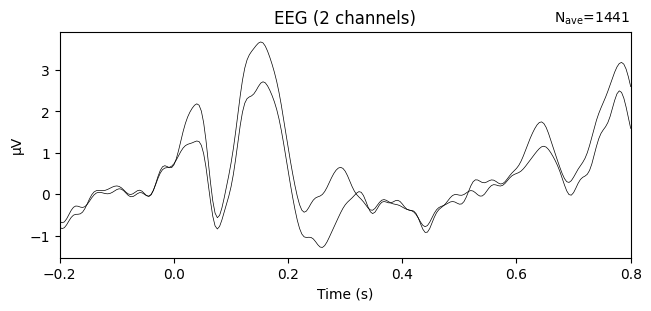

In [77]:
epochs.average().plot(picks=picks)
plt.show()

combining channels using "mean"
combining channels using "mean"


/var/folders/g2/378vjvgj0vq1r9_l6pb_nbz00000gn/T/ipykernel_99973/982666874.py:2: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(
/var/folders/g2/378vjvgj0vq1r9_l6pb_nbz00000gn/T/ipykernel_99973/982666874.py:2: RuntimeWarning: Cannot find channel coordinates in the supplied Evokeds. Not showing channel locations.
  mne.viz.plot_compare_evokeds(


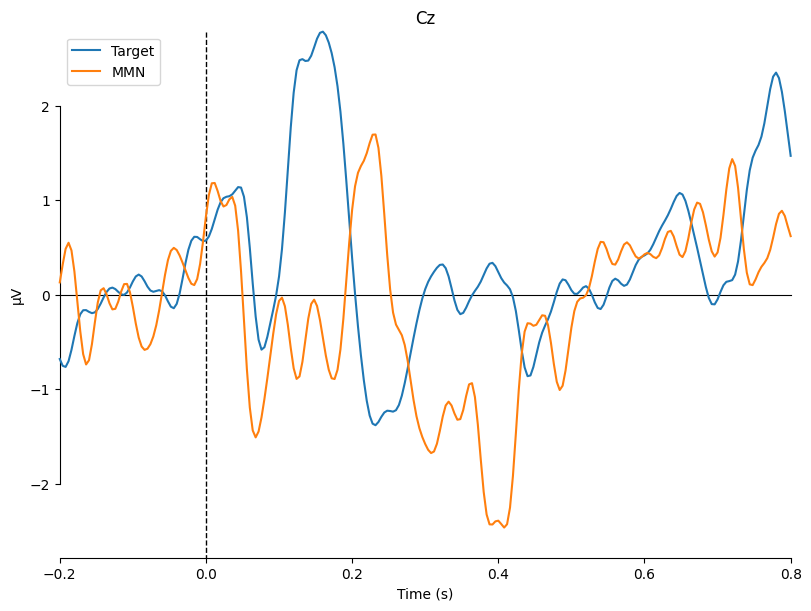

[<Figure size 800x600 with 1 Axes>]

In [84]:
mmn = mne.combine_evoked([epochs['oddball'].average(), epochs['target'].average()], weights=[1, -1])
mne.viz.plot_compare_evokeds(
    {"Target": epochs['target'].average(), "MMN": mmn},
    picks='Cz',
    combine='mean',
    show=True
)